# Latent Dirichlet Allocation (LDA)

- Latent Dirichlet Allocation (LDA)는 베이지안 기법을 이용해 문서에 존재 된 토픽을 추정하는 텍스트 마이닝 기법
- LDA의 기본이 되는 Gibbs sampling 기법을 수식과 예제와 함께 살펴 보자

목차<br>
1. 기본 개념
2. Generative Process
3. Inference
4. Gibbs Sampling
5. Collapsed Gibbs Samping

# 1. 기본 개념

<b>1) 모델</b><br>
- 문서에는 잠재된 보이지 않는 토픽이 존재<br>
- 문서는 여러 가지 잠재 토픽으로 구성
- 문서 안의 단어는 토픽에서 생성 된 것
- 문서를 구성하는 토픽의 확률과 토픽을 구성하는 단어의 확률을 추정하는 것이 목표


<b>2) 가정</b><br>
- Bag of words: 단어의 순서는 중요하지 않음 ex) 나는 밥을 먹었다 <=> 먹었다 나는 밥을<br>
- Exchangeability: Bag of words 가정을 확률적으로 표현한 것으로 모수가 주어졌을 때 Conditionally iid라는 가정

# 2. Generative Process

<b>1) Notation</b><br>
<br>
- Vocabulary: 모든 단어의 unique한 집합(사전)
- 단어: vocabulary에 있는 항목으로 1부터 $V$까지 index가지고 있음<br>
- 문서: $N$개의 단어의 순열로 $\mathbf{w}=(w_{1},..,w_{N})$로 표현 됨, 여기서 $w_{n}$은 순열에서 $n$번째 단어<br>
- Corpus: $M$개의 문서의 집합 $D=(\mathbf{w}_{1},...,\mathbf{w}_{M})$


<b>2) Generative Process</b><br>


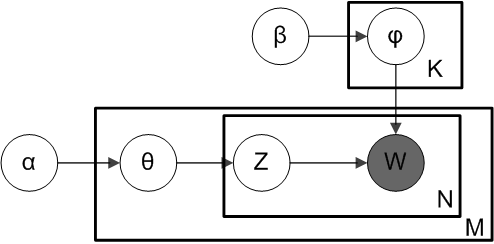

In [244]:
from IPython.display import Image
Image(filename='C:/Users/bki19/Desktop/text_mining/Smoothed_LDA.png')

출처: https://en.wikipedia.org/wiki/File:Smoothed_LDA.png

1. $\theta^{(i)}=(\theta_{1},...,\theta_{K}) \sim Diri(\alpha)$  $i=1,..,M$, $\theta^{(i)} \in R^{K}$<br>
=> 각 문서는 $\theta^{(i)}$의 확률로 토픽이 구성<br>
=> $\theta_{1},..,\theta_{M}$은 각 문서를 토픽이 구성하는 확률에 대한 벡터<br>
= >$\alpha$는 보통 symmetric (같은 값을 같고) 하고 sparse하게 설정(1이하로 설정)<br>
모든 문서의 토픽 확률: $\theta=\begin{bmatrix}
    \theta^{(1)}\\
    ...\\
    \theta^{(M)} \\
\end{bmatrix}$ $,\mathbf{\theta}\in R^{MxK}$<br>
각 문서마다 토픽의 확률: $\theta^{(i)}=(\theta_{1}^{(i)},...,\theta_{k}^{(i)} )$


2. $\varphi_{k}\sim Diri(\beta_{k})$ $k=1,...,K$ $\varphi_{k} \in R^{V}$<br>
=> 각 토픽은 vocabulary 차원의 $\varphi$의 확률은 가진 단어로 구성<br>
=> $\varphi_{1},..,\varphi_{K}$은 각 토픽을 구성하는 단어의 확률에 대한 벡터<br>
= >$\beta_{i}$는 보통 sparse하게 설정<br>
모든 단어의 확률: $\varphi=\begin{bmatrix}
    \varphi_{1}\\
    ...\\
    \varphi_{K} \\
\end{bmatrix}$<br>
각 토픽마다 단어의 확률: $\varphi_{k}=(\beta_{k,1},...,\beta_{k,V})  $ 

3. $i,j$는 단어의 위치로 $i=1,..,M$ $j=1,...,N_{i}$<br>
(a) $z^{(i)}_{j}\sim Categorical (\theta_{i})$<br>
(b) $w^{(i)}_{j}\sim Categorical (\varphi_{z^{(i)}_{j}} )$

<정리><br>
Corpus 수준에서 Dirichlet 분포를 통해 파리미터 $\theta$와 $\varphi$가 발생하고<br>
$\theta$는 문서에 대한 토픽의 확률로 Categorical 분포를 통해 문서의 토픽 $z$가 발생<br>
문서의 토픽이 $z$면 이에 대응하는 확률 $\varphi$로 Categorical 분포를 통해 단어가 생성<br>

<b>3) Generative process 예제</b>

<b>데이터 소개 및 요약</b><br>
<br>
- Wikipedia에서 수집한 경제학과 스포츠에 대한 6개의 문서를 위의 과정 적용<br>
- $V=526$: 모든 문서에 총 526 종류의 단어가 존재<br>
- $M=6$: 총 6개의 문서 존재<br>
- 각 문서의 길이: $N_{1}=153,N_{2}=242,N_{3}=183,N_{4}=152,N_{5}=183,N_{6}=225$

In [10]:
def File_Reader(PATH):
    with open(PATH, 'r',encoding='utf-8') as file:
        data = file.read().replace('\n', '')
    return data

In [4]:
import os
os.chdir('C:/Users/bki19/Desktop/text_mining/data')

In [13]:
doc1=File_Reader('econ1.txt')
doc2=File_Reader('econ2.txt')
doc3=File_Reader('econ3.txt')
doc4=File_Reader('sns1.txt')
doc5=File_Reader('sns2.txt')
doc6=File_Reader('sns3.txt')

Data=[doc1,doc2,doc3,doc4,doc5,doc6]

In [15]:
doc1[0:20]

'\ufeff경제학은 재화나 용역의 생산과 분배'

In [16]:
# Extract Noun
from konlpy.tag import Okt
#h=Hannanum()
h=Okt()
Corpus=[]
for i in Data:
    Corpus.append(h.nouns(i))

In [23]:
def Preprocess(data):
    data=[x for x in data if len(x)>=2 ]
    return data

In [43]:
for i in range(len(Corpus)):
    Corpus[i]=Preprocess(Corpus[i])

전처리:<br>
명사만 추출<br>
한글자 짜리 단어 제거

In [46]:
Vocab=set(Corpus[0]+Corpus[1]+Corpus[2]+Corpus[3]+Corpus[4]+Corpus[5])
V=len(Vocab)
M=len(Corpus)
print(V)
print(M)

526
6


Vocabulary size, 문서 수 확인

In [47]:
for i in Corpus:
    print(len(i))

153
242
183
152
183
225


문서마다 단어 수 확인

<b>단어 사전 만들기</b>
- 각 단어에 대한 index를 부여, 예를 들어 경제라는 단어는 24번으로 입력

In [48]:
Vocab_dict=dict(zip(sorted(Vocab), range(len(Vocab))))
Vocab_dict['경제']

27

In [49]:
Corpus2=[]
for j in Corpus:
    A=[]
    for i in j:
        if i in Vocab_dict.keys():
            A.append(Vocab_dict[i])
    Corpus2.append(A)

단어의 index로 바꿔줌 <br>
['경제학','재화','용역',,...]=>[19,122,100,..,]

<b>Hyperparamter 설정</b><br>

In [50]:
K=2
alpha=1
beta=1

$K=2$ 2개의 토픽이 있다고 가정<br>
$\alpha=1$<br>
$\beta=1$<br>

<b>생성 과정</b>

1) $\theta^{(i)}\sim Diri(\alpha)$  $i=1,..,M$, $\theta^{(i)} \in R^{K}$<br>


In [64]:
import numpy as np
T=np.random.dirichlet(alpha*np.ones(K),size=M)

$\mathbf{\theta}\in R^{MxK}=R^{6x2}$=>문서마다 토픽의 확률

In [65]:
import pandas as pd
pd.DataFrame(T,columns=['Topic1','Topic2'])

,Topic1,Topic2
0,0.596965,0.403035
1,0.154017,0.845983
2,0.412084,0.587916
3,0.612261,0.387739
4,0.799363,0.200637
5,0.788587,0.211413


문서마다 할당 된 토픽의 확률

2) $\varphi_{k}\sim Diri(\beta_{k})$ $k=1,...,K$ $\varphi_{k} \in R^{V}$<br>
$\mathbf{\varphi}\in R^{KxV}=R^{2x146}$=>토픽마다 단어의 확률

In [66]:
G=np.random.dirichlet(beta*np.ones(V),size=K)

In [67]:
pd.DataFrame([G[0][0:5],G[0][0:5]],index=['Topic1','Topic2'],columns=['Word1','Word2','Word3','Word4','Word5'])

,Word1,Word2,Word3,Word4,Word5
Topic1,0.005036,0.006143,0.000431,0.002115,0.000132
Topic2,0.005036,0.006143,0.000431,0.002115,0.000132


토픽을 구성하는 단어의 확률

3) $z_{ij}\sim Multinomial (\theta_{i})$, $z_{ij}=1,...K$ <br>
=> 단어가 어떤 토픽에서 왔는지<br>
예를들어 1번 문서의 첫 번째 단어를 보면 $z_{11}\sim Multinomial (\theta_{1})$에서 $z_{11}=1$이 나오면 토픽 1,2 중에 1번에서 나온것으로 취급<br>
<br>
$w_{ij}\sim Multinomial (\varphi_{z_{ij}})$, $w_{ij}=1,...,V$<br>
만약 $z_{11}$가 1번 토픽에서 sampling 됐으면 1번 토픽에 해당하는 $\varphi_{1}=(\varphi_{11},...,\varphi_{146})$에서 $w_{11}$를 샘플링

In [68]:
W=[]
N=[]
for i in range(M):
    Ni=len(Corpus2[i])
    N.append(Ni)
    Z=[]
    for j in range(Ni):
        t=np.random.multinomial(1, T[i])
        t=np.argmax(t)
        v=np.random.multinomial(1, G[t])
        v=np.argmax(v)
        Z.append(v)
    W.append(Z)


In [69]:
W2=[]
for i in W:
    ii=[]
    for j in i:
        ii.append(list(Vocab_dict.keys())[list(Vocab_dict.values()).index(j)])
    W2.append(ii)

In [70]:
import pandas as pd
pd.DataFrame([W2[0][0:5],W2[1][0:5]],index=['Document1','Document2'],columns=['Word1','Word2','Word3','Word4','Word5'])

,Word1,Word2,Word3,Word4,Word5
Document1,언급,근황,하버드대,다른,상표
Document2,행사,모든,참여,여기,해당


문서1과 문서 2에 생성된 단어 5개씩

# 3. Inference

위의 과정은 결국<br>
- 모든 random variable $w,z,\theta,\varphi$의 Joint pdf $p(w,z,\theta,\varphi|\alpha,\beta)=p(\theta|\alpha)p(\varphi|\beta)p(z|\theta)p(w|\varphi_{z})$의 샘플링 과정
- 하지만 $z,\theta,\varphi$가 관심사이고 $w$는 실제 데이터에서 주어져 있음
- 따라서 실제 구해야 하는 것은 데이터 $w$가 주어졌을 때의 사후 분포 $p(z,\theta,\varphi|w,\alpha,\beta)$
- 하지만 사후분포 $p(z,\theta,\varphi|w,\alpha,\beta)=\frac{p(w,z,\theta,\varphi|\alpha,\beta)}{p(w|\alpha,\beta)}$로 분자의 경우 위의 과정을 통해 추정할 수 있지만 분모는 intractable하기 때문에 직접적으로 구할 수가 없음
- 베이지안에서 가장 많이 사용하는 방법 중 하나인 Gibbs Sampling을 통해 이 문제 해결 가능

# <b>4. Gibbs Sampling</b>

- 결합 분포 $p(z,\theta,\varphi|w,\alpha,\beta)$는 Gibbs sampling을 통해 추정할 수 있음<br>
- Gibbs sampling은 위의 결합 분포의 주변부 분포<br>
$p(\theta|z,\varphi,w,\alpha,\beta)$<br>
$p(z|\theta,\varphi,w,\alpha,\beta)$<br>
$p(\varphi|z,\theta,w,\alpha,\beta)$<br>를 이용하여 iterative 하게 샘플링해서 구할 수 있음

<b>1) Joint pdf</b>

먼저 원하는 조건부 분포를 유도하기 위해서 모든 random variable의 결합 분포를 구함<br>
$p(w,z,\theta,\varphi|\alpha,\beta)=p(\theta|\alpha)p(\varphi|\beta)p(z|\theta)p(w|\varphi_{z})$<br>
$=(\prod_{k=1}^{k} p(\varphi_{k}|\beta )(\prod_{i=1}^{N} p(\theta^{(i)}|\alpha)\prod _{j=1}^{M} p(z^{(i)}_{j}  |\theta^{(i)} )p(w^{(i)}_{j} |\varphi, z^{(i)}_{j}  )   ) $

<b>2) Conditional pdf of $\theta$</b>

$p(\theta^{(i)}|\theta^{(-i)},z,\varphi,w,\alpha,\beta)$<br>
$\propto   p(\theta^{(i)}|\alpha)\prod _{j=1}^{M} p(z^{(i)}_{j}  |\theta^{(i)} ) $<br>
$= \prod_{k=1}^{K}(\theta^{(i)}_{k}  )^{\alpha-1} \prod_{j=1}^{M}\prod_{k=1}^{K} (\theta^{(i)}_{k}  )^{I(z_{j}^{(i)}=k)   }  $<br>
$= \prod_{k=1}^{K}(\theta^{(i)}_{k}  )^{\alpha-1+\sum_{j=1}^{M} I(z_{j}^{(i)}=k)   }$<br>
$\sim Dir(\alpha+m^{(i)}_{k})$

여기서 $m^{(i)}_{k}\equiv \sum_{j=1}^{M} I(z_{j}^{(i)}=k) $ <br>로 $i$번째 문서에 단어가 $k$번째 토픽으로 할당된 총 숫자<br>
$\theta^{(-i)}$:$i$번째 문서 외 나머지 문서들의 토픽 분포<br>

<b>3) Conditional pdf of $\varphi$</b>

$p(\varphi_{k}|\varphi_{-k},z,\theta,w,\alpha,\beta)$<br>
$\propto p(\varphi_{k}|\beta) (\prod_{i=1}^{N_{i}} \prod_{j=1}^{M}p(w^{(i)}_{j})|\varphi,z^{(i)}_{j})^{I(z^{(i)}_{j}=k)  })   $<br>
$=(\prod_{v=1}^{V}\varphi_{k,v}^{\beta-1} ) (\prod_{i=1}^{N_{i}}\prod_{j=1}^{M}\prod_{j=1}^{M} \prod_{v=1}^{V}  \varphi_{k}^{I(w_{j}^{(i)}=v\wedge z^{(i)}_{j}=k)  }             )  $<br>
$=\prod_{v=1}^{V}\varphi_{k,v}^{\beta-1+\sum_{i=1}^{N_{i}}\sum_{j=1}^{M} I(w_{j}^{(i)}=v\wedge z^{(i)}_{j}=k)}$ <br>
$\sim Dir(\beta+n_{k})$<br>
<br>
$n_{k,v} \equiv I(w_{j}^{(i)}=v\wedge z^{(i)}_{j}=k)$라고 하면 현재 상태에서 문서에 상관 없이 단어 $v$가 토픽$k$에 할당 된 숫자<br>
$n_{k}=(n_{k,1}...,n_{k,v})$

<b>3) Conditional distribution of z</b>

$p(z^{(i)}_{j}=k|\theta,\varphi,z_{-(i,j)},w,\alpha,\beta)$<br>
$\propto p(z^{(i)}_{j}=k|\theta^{(i)} )p(w_{j}^{(i)}  |\varphi,z_{j}^{(i)})=\theta_{k}^{(i)} \varphi_{k,w_{j}^{(i)}} $<br>
$\sim Categorical (\theta_{k}^{(i)} \varphi_{k,w_{j}^{(i)}})$

결국 세가지의 조건부 사후 분포가 Dirichlet와 Multinomial 분포로 심플해지는 장점이 있음

<b> 4) Gibbs sampling 구현</b>

하이퍼 파라미터 $\alpha,\beta, T$ 설정 및 $\theta$, $\varphi$, $Z$의 초기치 설정 

In [85]:
#Hyperparamter
alpha=0.1
beta=0.1
K=2 ##number of topics
Iteration=2000

#1. Initialize theta matrix (Documter topic distribution)
import numpy as np
T=np.random.dirichlet(alpha*np.ones(K),size=M)

#2. Initialzie varphi matrix (Topic word distribution)
G=np.random.dirichlet(beta*np.ones(V),size=K)

#3. Initialzie Z matrix (Word topic assignment)   
Z=[]
for i in range(M):
    Ni=len(Corpus2[i])
    zz=[]
    for j in range(Ni):
        z=np.random.randint(K-1)
        zz.append(z)
    Z.append(zz)


1) $p(\theta^{(i)}|\theta^{(-i)},z,\varphi,w,\alpha,\beta)$에서 $\theta$ sampling<br>
2) Sampling 된 $\theta$를 이용하여 $p(z^{(i)}_{j}=k|\theta,\varphi,z_{-(i,j)},w,\alpha,\beta)$ 샘플링<br>
3) $p(\varphi_{k}|\varphi_{-k},z,\theta,w,\alpha,\beta)$ 샘플링<br>

In [86]:
for t in range(Iteration):
    
    ###1. z (word topic assignment)
    for i in range(M):
        for j in range(N[i]):
            theta=np.log(T[i] )
            word_loc=Corpus2[i][j]
            varphi=np.log(G[:,word_loc] )

            z_param=np.exp(theta+varphi)
            z_param/= np.sum(z_param) ##normalization

            Z[i][j]=np.random.multinomial(1, z_param).argmax()
    ###2. theta (Document per topic distribution)
    for i in range(M):
        m = []
        for k in range(K):
            m.append( Z[i].count(k))

        T[i, :]=np.random.dirichlet(alpha + np.array(m) )

    ###3. varphi (word topic distribution)
    for k in range(K):
        n=np.zeros([K,V])

        for i in range(M):
            for j in range(N[i]):
                word_loc2=Corpus2[i][j]
                n[k,word_loc2]+=1
        G[k, :] = np.random.dirichlet(beta + n[k])

In [87]:
pd.DataFrame(T,columns=['Topic1','Topic2'])

,Topic1,Topic2
0,0.358885,0.641115
1,0.455121,0.544879
2,0.429780,0.570220
3,0.570069,0.429931
4,0.400043,0.599957
5,0.529611,0.470389


- 직관적으로는 토픽 중 하나는 경제 기사, 하나는 SNS에 대한 주제로 구성 되어야 됨
- 하지만 두 토픽의 분포가 뚜렷하게 구분이 가지 않음

In [88]:
W2=[]

for i in range(K):
    W1=[]
    JJ=G[i].argsort()[-10:][::-1]
    for j in JJ:
        W1.append (list(Vocab_dict.keys())[list(Vocab_dict.values()).index(j)])
    W2.append(W1)

In [89]:
pd.DataFrame(W2,index=['Topic1','Topic2'])

,0,1,2,3,4,5,6,7,8,9
Topic1,대상,경제학,사용자,활동,페이스북,경제,인간,경우,때문,연구
Topic2,경제학,사용자,페이스북,경제,활동,사용,대상,인스타그램,생산,서비스


각 토픽을 구성하는 단어를 상위 10개씩 정렬

<b>왜 경제와 SNS로 토픽이 명확하게 구분되지 않았을까?</b>
- Iteration이 부족해서 아직 수렴하지 않았을 수 있음<br>
=>$z^{(i)}_{j}$를 하나씩 sampling 해야 되서 속도가 매우 느림
- 각 문서 길이가 충분하지 않았을 가능성<br>
=> LDA는 문서 길이가 길어야 결과가 좋음<br>
- Hyper parameter $\alpha$,$\beta$의 잘 못된 설정<br>
=> 두 파라미터는 문서의 토픽을 명확하게 나누는데 영향을 주고 작을 수록 토픽이 명확하게 나눠짐<br>
- 추정된 잠재된 토픽이 경제와 SNS가 아닌 다른 토픽일 가능성<br>
=> 해석하기 어려운 방향으로 추정됐을 수 있음

# 5. Collapsed Gibbs Sampling

- LDA에 Gibbs sampling을 적용했을 때 너무 느리다는 단점이 있었음
- 파라미터에 대한 inference보다는 사후 분포의 직접적인 예측이 목적일 수 있음<br>
- 이때 $\theta$, $\varphi$의 inerence가 관심사가 아니고 잠재 토픽 $z$만 관심사라면? 
- Collapsed Gibbs는 $\theta$, $\varphi$를 marginalize out하여 계산을 simple하게 만드는 방법
- 이제 $p(z^{(i)}_{j}=k|z_{-(i,j)},w)$가 관심사

<b>1) $z$의 추정 </b>

$p(z^{(i)}_{j}=k|z_{-(i,j)},w)=\frac{[n_{-(i,j),k}]_{w^{(i)}_{j}} +\beta }{ \sum_{v^{'} }[n_{-(i,j),k}]_{v^{'} } +V\beta   }  \frac{ [m_{-(i,j),k}]_{k}+\alpha    }{  \sum_{k^{'}} [m_{-(i,j),k}]_{k^{'}}+K \alpha }  $

$[n_{-(i,j),k}]_{w^{(i)}_{j}}\in V$: Vocabulary에서 $v$번째 단어가 토픽 $k$에 할당 된 횟수<br>
$[m_{-(i,j),k}]_{k^{'}}\in K$: 문서 $i$번째 문서가 topic $k^{'}$에 할당 된 횟수<br>
=> 앞부분: 단어 $w^{(i)}$가 topic $k$에 할당 될 확률<br>
=> 뒷부분: 문서 $i$가 topic $k$에 할당 될 확률<br>
=> z에 대한 사후 분포가 비율로 심플하게 나타나짐

하이퍼 파라미터 설정

In [176]:
#Hyperparamter
alpha=0.01
beta=0.01
K=2 ##number of topics
Iteration=2000

초기치 설정

In [178]:
z_m_n = [] # topics of words for all documents
n_m_z = np.zeros((M, K))     # document and topic
n_z_t = np.zeros((K, V)) # Topic vocabulary
n_z = np.zeros(K)        # word count of each topic

for i in range(M):
    z_n=[]
    for j in range(N[i]):
        z=np.random.randint(0,K)
        z_n.append(z) #sample topic
        n_m_z[i, z] += 1 #add document topic
        ind=Corpus2[i][j]
        n_z_t[z, ind] += 1 #add topic vocabulary
        n_z[z] += 1
    z_m_n.append(np.array(z_n))

$z$ 추정<br>
update할 때 현재 상태는 카운트 안 함

In [ ]:
for t in range(Iteration):
    for i in range(M):
        for j in range(N[i]):
            # discount for n-th word t with topic z
            z = z_m_n[i][j]
            n_m_z[i, z] -= 1 #document topic
            ind=Corpus2[i][j]
            n_z_t[z, ind] -= 1 #topic vocabulary
            n_z[z] -= 1 #topic vocabulary

            # sampling new topic
            p_z = (n_z_t[:, ind] + beta) * (n_m_z[i] + alpha) / (n_z + V * beta)
            new_z = np.random.multinomial(1, p_z / p_z.sum()).argmax()

            # preserve the new topic and increase the counters
            z_m_n[i][j] = new_z
            n_m_z[i, new_z] += 1

            n_z_t[new_z, ind] += 1
            n_z[new_z] += 1

<b>2. $\theta$, $\varphi$</b>

$\hat{\theta}= \frac{ [m_{(i,j),k}]_{k}+\alpha    }{  \sum_{k^{'}} [m_{(i,j),k}]_{k^{'}}+K \alpha }  $<br>
$\hat{\varphi}=\frac{[n_{(i,j),k}]_{w^{(i)}_{j}} +\beta }{ \sum_{v^{'} }[n_{(i,j),k}]_{v^{'} } +V\beta   }   $
=> $\theta$, $\varphi$는 iteration 없이 z를 추정하는 과정에서 계산된 것을 이용하여 추정

In [184]:
T_hat=np.zeros([M,K])
for i in range(M):
    T_hat[i]=(n_m_z[i]+alpha) / (np.sum(n_m_z[i]) +K*alpha)

In [186]:
pd.DataFrame(T_hat,columns=['Topic1','Topic2'])

,Topic1,Topic2
0,0.065416,0.934584
1,0.037228,0.962772
2,0.065621,0.934379
3,0.999934,0.000066
4,0.999945,0.000055
5,0.999956,0.000044


1~3번 문서는 토픽 1일 확률이 높고 4~6은 토픽 2의 확률이 매우 높음<br>
=> 두 종류의 문서가 뚜렷하게 구분 됨

In [240]:
G_hat=np.zeros([K,V])
for j in range(K):
    G_hat[j]=(n_z_t[j]+beta) / (np.sum(n_z_t[j]) +V*beta)

In [241]:
TOP=pd.DataFrame(G_hat ,columns=sorted(Vocab))

In [242]:
TOP1=pd.DataFrame(TOP.iloc[0].sort_values(0, ascending=False).transpose())[0:10]
TOP1.columns=['Topic1']
TOP2=pd.DataFrame(TOP.iloc[1].sort_values(0, ascending=False).transpose())[0:10]
TOP2.columns=['Topic2']
TOP1

,Topic1
사용자,0.052008
페이스북,0.031882
활동,0.020142
인스타그램,0.020142
미국,0.015111
친구,0.013434
서비스,0.013434
트위터,0.013434
세계,0.011757
통해,0.011757


In [243]:
TOP2

,Topic2
경제학,0.059773
경제,0.036233
대상,0.028990
연구,0.027179
인간,0.019936
경우,0.016315
철수,0.016315
민희,0.016315
영희,0.016315
재화,0.014504


- 토픽을 구성하는 상위 단어를 봤을 때 토픽 1은 SNS 관련 단어가 많이 나오고 토픽 2는 경제학 관련 단어로 구성됨
- 경제 문서에서 영희 철수와 같은 사람의 이름으로 비유를 많이 해서 이와 같은 단어가 상위 단어가 됐을 가능성이 있음
- 고유명사 처리 및 전처리를 더 할 필요성이 있음

<b>Collpased Gibbs Sampling 문제점</b>

- 여전히 하이퍼 파라미터 설정에서 자유롭지 못함
- Gibbs sampling 보다 속도는 훨씬 빠르지만 정확성은 떨어짐

<b>출처</b>

- Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003). Latent dirichlet allocation. Journal of machine Learning research, 3(Jan), 993-1022.
- Darling, W. M. (2011, December). A theoretical and practical implementation tutorial on topic modeling and - gibbs sampling. In Proceedings of the 49th annual meeting of the association for computational linguistics: Human language technologies (pp. 642-647).
- https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation
- https://wiseodd.github.io/techblog/2017/09/07/lda-gibbs/
- http://brooksandrew.github.io/simpleblog/articles/latent-dirichlet-allocation-under-the-hood/
- https://ethen8181.github.io/machine-learning/clustering_old/topic_model/LDA.html
- https://medium.com/@pasdan/latent-dirichlet-allocation-via-python-ef77b86dcee5
- https://books.google.co.kr/books?id=oBV8DAAAQBAJ&pg=PA109&lpg=PA109&dq=gibbs+sampling+for+lda+conditional&source=bl&ots=bcf4nWqFy4&sig=ACfU3U2GtQ6kpGgUxA3LhN_dArrYU6tGqw&hl=en&sa=X&ved=2ahUKEwiW84et89fiAhX5yosBHYlDB5Y4HhDoATANegQICRAB#v=onepage&q=gibbs%20sampling%20for%20lda%20conditional&f=false
- https://shuyo.wordpress.com/2011/05/31/collapsed-gibbs-sampling-estimation-for-latent-dirichlet-allocation-2/